In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
# checking the descriptive statistics of the data
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [4]:
Q1 = df.Height.quantile(0.25)
Q3 =df.Height.quantile(0.75)
print(Q1,Q3,sep = '\n\n')

63.505620481218955

69.1742617268347


In [21]:
# checking my interquartile range
IQR = Q3-Q1
IQR

5.668641245615746

In [22]:
# checking for my lower and upper limit
lower_limit =Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit,sep = "\n\n")

55.00265861279534

77.67722359525831


In [23]:
# checking for my outliers 
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [24]:
# removing the outliers from my original dataframe
DF_NO_OUTLIERS =df[(df.Height<lower_limit)&(df.Height>upper_limit)]
DF_NO_OUTLIERS


,Gender,Height,Weight


In [25]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [29]:
Q1 = df.Weight.quantile(0.25)
Q3 =df.Weight.quantile(0.75)
print(Q1,Q3,sep = '\n\n')

135.8180513055015

187.16952486868348


In [30]:
# checking my interquartile range
IQR = Q3-Q1
IQR

51.35147356318197

In [31]:
# checking for my lower and upper limit
lower_limit =Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit,sep = "\n\n")

58.79084096072856

264.19673521345646


In [32]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


# removing outliers using Box plot

<AxesSubplot:ylabel='Height'>

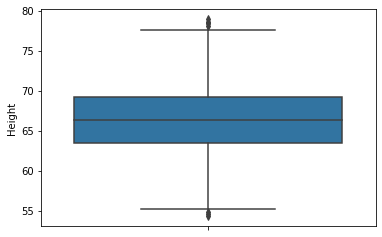

In [5]:
sns.boxplot(y = "Height",data =df)

In [34]:
df["Height"].mean()

66.36755975482106

In [6]:
df1=df[df["Height"]<77]

<AxesSubplot:ylabel='Height'>

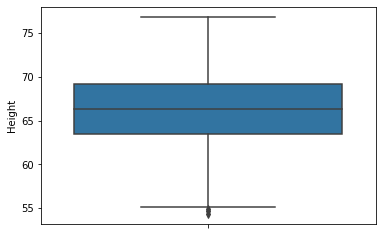

In [7]:
sns.boxplot(y = "Height",data = df1)

In [9]:
df2=df1[df1["Height"]>55]

<AxesSubplot:xlabel='Height'>

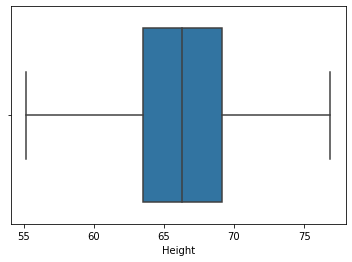

In [10]:
sns.boxplot(x="Height",data = df2)

In [11]:
df2["Height"].mean()

66.35737013950396

<AxesSubplot:ylabel='Weight'>

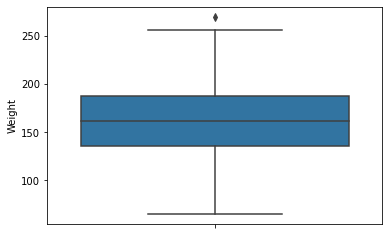

In [39]:
sns.boxplot(y = "Weight",data =df)

In [40]:
df["Weight"].mean()

161.44035683283076

In [42]:
df1=df[df["Weight"]<265]

<AxesSubplot:ylabel='Weight'>

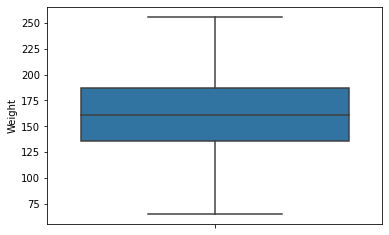

In [43]:
sns.boxplot(y="Weight",data = df1)

In [46]:
df1["Weight"].mean()

161.42950081306154

In [47]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
DF = pd.read_csv("AB_NYC_2019.csv")
DF

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [34]:
DF.shape

(48895, 16)

In [36]:
# since i am dealing with outliers in price i will first describe price
DF.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
Q1 = DF.price.quantile(0.25)
Q3 =DF.price.quantile(0.75)
print(Q1,Q3,sep = '\n\n')

69.0

175.0


In [8]:
# checking my interquartile range
IQR = Q3-Q1
IQR

106.0

In [9]:
# checking for my lower and upper limit
lower_limit =Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit,sep = "\n\n")

-90.0

334.0


In [10]:
DF[(DF.price<lower_limit)|(DF.price>upper_limit)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9
